In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import matplotlib.patches as mpatches
from scipy.stats import gaussian_kde
import scipy.interpolate

import warnings
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = "Gill Sans MT"

In [2]:
df_anversa_mesh = pd.read_csv("../0_data/fig_1_anversa_11777997_mesh.tsv", sep="\t")
df_honzo_mesh = pd.read_csv("../0_data/fig_1_honzo_11015443_mesh.tsv", sep="\t")

df_anversa_aid = pd.read_csv("../0_data/fig_1_anversa_11777997_aid.tsv", sep="\t")
df_honzo_aid= pd.read_csv("../0_data/fig_1_honzo_11015443_aid.tsv", sep="\t")

In [3]:
def return_kde_coord_mesh(input_df, ymin, ymax, xmax=16):
    data = np.array(input_df[['Year_Diff', 'MeSH_cos_dist']])
    values = data.T
    kde = stats.gaussian_kde(values)

    # Here you can set xi to range from 0 to xmax (16 or any other upper limit)
    xi, yi = np.mgrid[0:xmax:150j, ymin:ymax:150j]
    coords = np.vstack([item.ravel() for item in [xi, yi]])
    density = kde(coords).reshape(xi.shape)

    return xi, yi, density

def return_kde_coord_aid(input_df, ymin, ymax, xmax=16):
    data = np.array(input_df[['Year_Diff', 'AID_cos_dist']])
    values = data.T
    kde = stats.gaussian_kde(values)

    # Here you can set xi to range from 0 to xmax (16 or any other upper limit)
    xi, yi = np.mgrid[0:xmax:150j, ymin:ymax:150j]
    coords = np.vstack([item.ravel() for item in [xi, yi]])
    density = kde(coords).reshape(xi.shape)

    return xi, yi, density

def plot_heatmap(xi, yi, density, title='KDE Heatmap', xlabel='Year Difference', ylabel='Cosine Distance', xlim=None):
    plt.figure(figsize=(8, 6))
    # Display the heatmap with specified extent and colormap
    heatmap = plt.imshow(density, origin='lower', extent=[xi.min(), xi.max(), yi.min(), yi.max()], aspect='auto', cmap='viridis')
    
    # Add a colorbar and set its label size
    cbar = plt.colorbar(heatmap, label='Density')
    cbar.set_label('Density', size=14)
    cbar.ax.tick_params(labelsize=14)  # Set font size for colorbar ticks
    
    # Set font sizes for labels and title
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # Set font size for the axis tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    # Set the limits of the x-axis if specified
    if xlim is not None:
        plt.xlim(xlim)

    plt.show()

In [4]:
x_c1a, y_c1a, z_c1a = return_kde_coord_mesh(df_anversa_mesh, 0.1,1.1, 16)
x_c1h, y_c1h, z_c1h = return_kde_coord_mesh(df_honzo_mesh, 0.1, 1.1, 19)

x_c2a, y_c2a, z_c2a = return_kde_coord_aid(df_anversa_aid, 0.1, 1.1, 16)
x_c2h, y_c2h, z_c2h = return_kde_coord_aid(df_honzo_aid, 0.1, 1.1, 19)

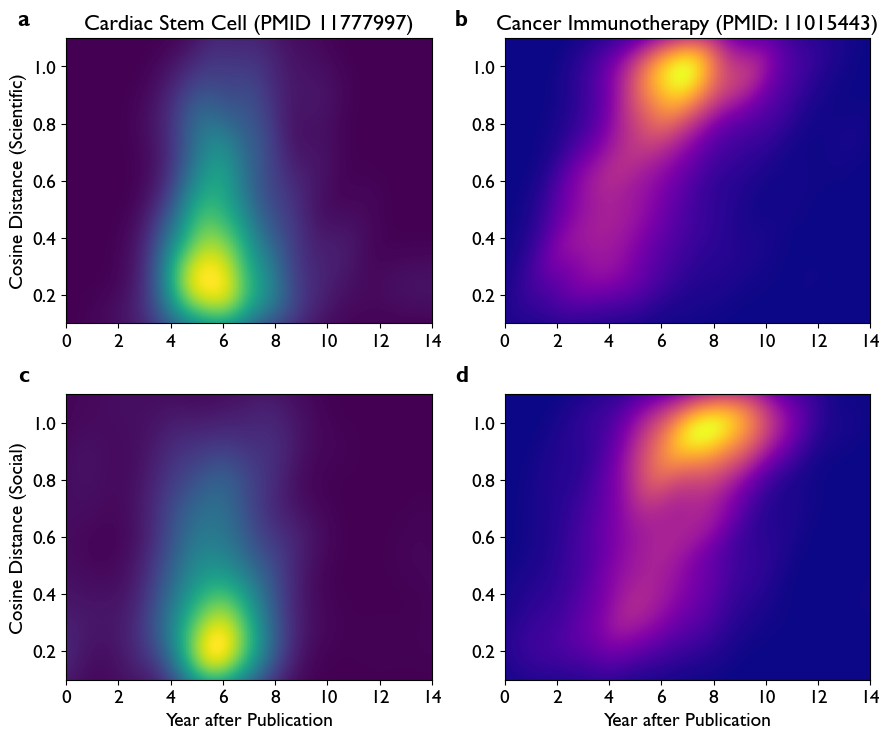

In [5]:
def plot_and_save_heatmaps(data_list, titles, filename, xlims=(0, 12)):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 7.5))  # Set an appropriate figure size
    axes = axes.flatten()  # Flatten the array to easily index it
    panel_labels = ['a', 'b', 'c', 'd']  # Panel labels
    colormaps = ['viridis', 'plasma', 'viridis', 'plasma']  # Assign different colormaps to each subplot

    # Plot each heatmap in the grid
    for i, ((xi, yi, density), title, cmap) in enumerate(zip(data_list, titles, colormaps)):
        ax = axes[i]
        heatmap = ax.imshow(density, origin='lower', extent=[xi.min(), xi.max(), yi.min(), yi.max()], aspect='auto', cmap=cmap)
        ax.set_title(title, fontsize=16)

        if i == 2 or i == 3:  # Bottom row gets x-axis labels
            ax.set_xlabel('Year after Publication', fontsize=14)

        if i % 2 == 0:  # Left column gets y-axis labels
            if i == 0:
                ax.set_ylabel('Cosine Distance (Scientific)', fontsize=14)
            if i == 2:
                ax.set_ylabel('Cosine Distance (Social)', fontsize=14)

        ax.set_xlim(xlims)
        ax.set_xticks(range(int(xlims[0]), int(xlims[1]) + 1, 2))
        ax.text(-0.1, 1.1, panel_labels[i], transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
        ax.tick_params(labelsize=14)

    # Adjust the layout to minimize white space further
    plt.subplots_adjust(hspace=0.00, wspace=0.00)
    plt.tight_layout()
    plt.savefig(filename, dpi=150,  format='tif')
    plt.show()

# Example data setup (assuming you have defined x_c1a, y_c1a, z_c1a, etc.)
data_list = [
    (x_c1a, y_c1a, z_c1a),
    (x_c1h, y_c1h, z_c1h),
    (x_c2a, y_c2a, z_c2a),
    (x_c2h, y_c2h, z_c2h)
]

# Titles for each subplot
titles = [
    'Cardiac Stem Cell (PMID 11777997)',
    'Cancer Immunotherapy (PMID: 11015443)',
    None,
    None
]

# File name to save the plot
filename = 'Extended_Data_Fig_1.tif'

# Plot and save all heatmaps in a 2x2 grid
plot_and_save_heatmaps(data_list, titles, filename, xlims=(0, 14))